## Association Rules Examples

### Beatles Songs That Are Played Together

In [111]:
import pandas as pd
import numpy as np

myData = pd.read_csv('C:/Users/lchen24/Downloads/Beatles_Songs.csv', header = None)

myData.head()

,0,1,2,3,4,5,6,7
0,Yesterday,Hey Jude,Come Together,All You Need Is Love,Yellow Submarine,A Day In The Life,Across the Universe,Here Comes the Sun
1,Yesterday,All You Need Is Love,Blackbird,Yellow Submarine,A Day In The Life,Here Comes the Sun,NaN,NaN
2,Hey Jude,Come Together,Blackbird,A Day In The Life,Here Comes the Sun,NaN,NaN,NaN
3,Come Together,Blackbird,Across the Universe,Here Comes the Sun,NaN,NaN,NaN,NaN
4,Blackbird,A Day In The Life,Here Comes the Sun,NaN,NaN,NaN,NaN,NaN


In [112]:
Transactions = [transaction[~pd.isnull(transaction)] for transaction in myData.values]
Transactions[:5]

[array(['Yesterday', 'Hey Jude', 'Come Together', 'All You Need Is Love',
        'Yellow Submarine', 'A Day In The Life', 'Across the Universe',
        'Here Comes the Sun'], dtype=object),
 array(['Yesterday', 'All You Need Is Love', 'Blackbird',
        'Yellow Submarine', 'A Day In The Life', 'Here Comes the Sun'],
       dtype=object),
 array(['Hey Jude', 'Come Together', 'Blackbird', 'A Day In The Life',
        'Here Comes the Sun'], dtype=object),
 array(['Come Together', 'Blackbird', 'Across the Universe',
        'Here Comes the Sun'], dtype=object),
 array(['Blackbird', 'A Day In The Life', 'Here Comes the Sun'],
       dtype=object)]

In [113]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [114]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
Transactions_Encoded = encoder.fit_transform(Transactions)
Transactions_df = pd.DataFrame(Transactions_Encoded, columns = encoder.columns_)

Transactions_df.head()

,A Day In The Life,Across the Universe,All You Need Is Love,Blackbird,Come Together,Here Comes the Sun,Hey Jude,Yellow Submarine,Yesterday
0,True,True,True,False,True,True,True,True,True
1,True,False,True,True,False,True,False,True,True
2,True,False,False,True,True,True,True,False,False
3,False,True,False,True,True,True,False,False,False
4,True,False,False,True,False,True,False,False,False


In [115]:
Transactions_df.sum() / len(Transactions_df)

A Day In The Life       0.47
Across the Universe     0.47
All You Need Is Love    0.49
Blackbird               0.41
Come Together           0.43
Here Comes the Sun      0.53
Hey Jude                0.47
Yellow Submarine        0.44
Yesterday               0.46
dtype: float64

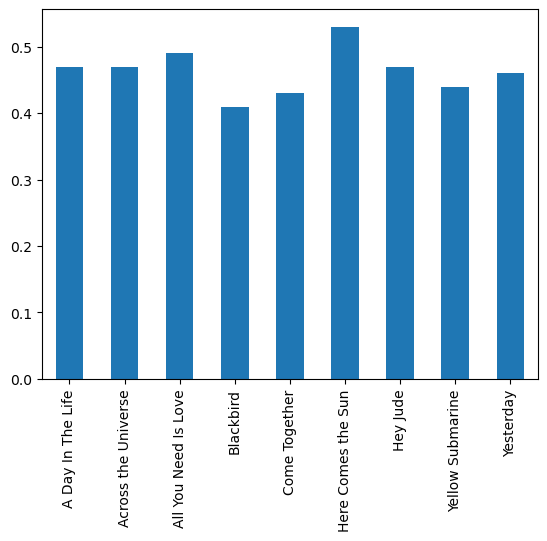

In [116]:
(Transactions_df.sum() / len(Transactions_df)).plot.bar();

In [117]:
%pip install efficient-apriori

In [118]:
from efficient_apriori import apriori

itemsets, rules = apriori(Transactions, min_support = 0.1,  min_confidence = 0.5)

In [119]:
Rules = pd.DataFrame({
    'Rule': [rule.__repr__() for rule in rules], 
    'Confidence': [rule.confidence for rule in rules], 
    'Support': [rule.support for rule in rules], 
    'Lift': [rule.lift for rule in rules], 
    'Count': [rule.count_full for rule in rules]
    })

In [120]:
Rules.sort_values('Lift', ascending = False)

,Rule,Confidence,Support,Lift,Count
101,"{Here Comes the Sun, Yellow Submarine} -> {A D...",0.500000,0.10,2.083333,10
97,"{All You Need Is Love, Here Comes the Sun, Yel...",0.833333,0.10,1.773050,10
52,"{Here Comes the Sun, Yellow Submarine} -> {A D...",0.800000,0.16,1.702128,16
100,"{A Day In The Life, All You Need Is Love, Here...",0.666667,0.10,1.515152,10
89,"{All You Need Is Love, Yesterday} -> {Yellow S...",0.666667,0.16,1.515152,16
...,...,...,...,...,...
18,"{A Day In The Life, Across the Universe} -> {A...",0.500000,0.12,1.020408,12
71,"{Across the Universe, Hey Jude} -> {Here Comes...",0.526316,0.10,0.993049,10
77,"{All You Need Is Love, Blackbird} -> {Here Com...",0.526316,0.10,0.993049,10
13,{Blackbird} -> {Here Comes the Sun},0.512195,0.21,0.966406,21


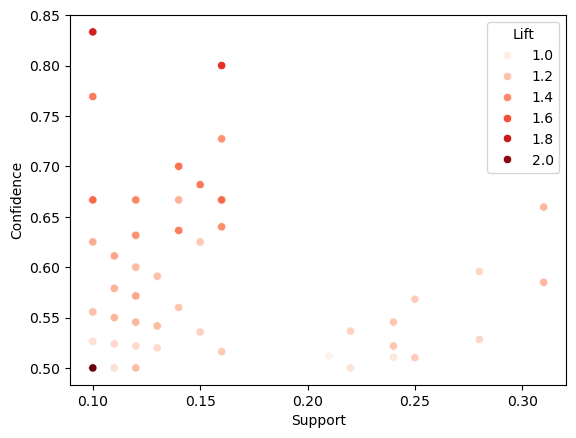

In [121]:
import seaborn as sns
sns.scatterplot(x = 'Support', 
                y = 'Confidence', 
                hue = 'Lift', 
                data = Rules, 
                palette = 'Reds');

In [122]:
df = pd.DataFrame(Rules.sort_values('Lift', ascending = False))

In [123]:
df.to_csv("Songs.csv", index=False, header=True)

### Another Example: Book Store

In [124]:
myData = pd.read_csv('C:/Users/lchen24/Downloads/CharlesBookClub(3).csv')

myData.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1


In [125]:
myData_cleaned = myData.drop(myData.columns[list(range(0,7)) + list(range(18,24))], axis=1)
myData_cleaned.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [126]:
myData_cleaned = myData_cleaned.applymap(lambda x: False if x == 0 else True)
myData_cleaned.head()

C:\Users\lchen24\AppData\Local\Temp\32\ipykernel_40180\2870576307.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  myData_cleaned = myData_cleaned.applymap(lambda x: False if x == 0 else True)


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,False,True,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [127]:
myData_cleaned.sum() / len(myData_cleaned)

ChildBks     0.39400
YouthBks     0.23825
CookBks      0.41550
DoItYBks     0.25475
RefBks       0.20475
ArtBks       0.22300
GeogBks      0.26675
ItalCook     0.10750
ItalAtlas    0.03250
ItalArt      0.04325
Florence     0.08450
dtype: float64

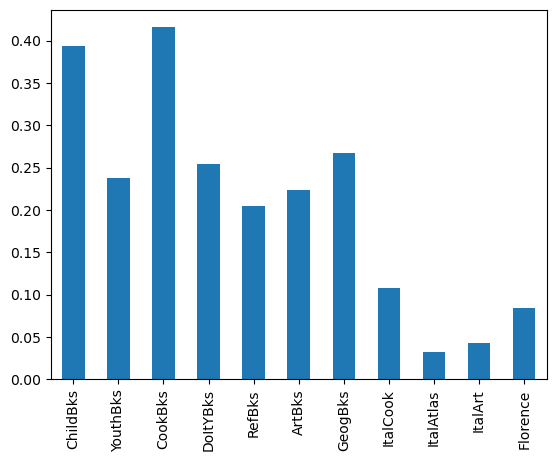

In [128]:
(myData_cleaned.sum() / len(myData_cleaned)).plot.bar();

In [129]:
from efficient_apriori import apriori

# myData_cleaned: DataFrame with boolean values (False/True) in book-type columns
transactions = [
    [col for col, val in row.items() if bool(val)]
    for _, row in myData_cleaned.iterrows()
]

# sanity check
print(transactions[:5])

[['YouthBks', 'CookBks'], [], ['ChildBks', 'YouthBks', 'CookBks', 'RefBks', 'GeogBks', 'ItalCook'], [], []]


In [130]:
itemsets, rules = apriori(transactions, min_support=0.1, min_confidence=0.5)

In [131]:
itemsets

{1: {('YouthBks',): 953,
  ('CookBks',): 1662,
  ('ChildBks',): 1576,
  ('RefBks',): 819,
  ('GeogBks',): 1067,
  ('ItalCook',): 430,
  ('ArtBks',): 892,
  ('DoItYBks',): 1019},
 2: {('ArtBks', 'ChildBks'): 421,
  ('ArtBks', 'CookBks'): 452,
  ('ChildBks', 'CookBks'): 968,
  ('ChildBks', 'DoItYBks'): 646,
  ('ChildBks', 'GeogBks'): 585,
  ('ChildBks', 'RefBks'): 513,
  ('ChildBks', 'YouthBks'): 590,
  ('CookBks', 'DoItYBks'): 675,
  ('CookBks', 'GeogBks'): 625,
  ('CookBks', 'RefBks'): 559,
  ('CookBks', 'YouthBks'): 644,
  ('DoItYBks', 'GeogBks'): 404,
  ('DoItYBks', 'YouthBks'): 413,
  ('GeogBks', 'YouthBks'): 418},
 3: {('ChildBks', 'CookBks', 'DoItYBks'): 511,
  ('ChildBks', 'CookBks', 'GeogBks'): 438,
  ('ChildBks', 'CookBks', 'RefBks'): 414,
  ('ChildBks', 'CookBks', 'YouthBks'): 480}}

In [132]:
Rules = pd.DataFrame({
    'Rule': [rule.__repr__() for rule in rules], 
    'Confidence': [rule.confidence for rule in rules], 
    'Support': [rule.support for rule in rules], 
    'Lift': [rule.lift for rule in rules], 
    'Count': [rule.count_full for rule in rules]
    })

In [133]:
Rules.sort_values('Lift', ascending = False)

,Rule,Confidence,Support,Lift,Count
19,"{RefBks} -> {ChildBks, CookBks}",0.505495,0.10350,2.088820,414
22,"{YouthBks} -> {ChildBks, CookBks}",0.503673,0.12000,2.081292,480
13,"{ChildBks, CookBks} -> {DoItYBks}",0.527893,0.12775,2.072198,511
14,"{DoItYBks} -> {ChildBks, CookBks}",0.501472,0.12775,2.072198,511
21,"{ChildBks, YouthBks} -> {CookBks}",0.813559,0.12000,1.958025,480
18,"{ChildBks, RefBks} -> {CookBks}",0.807018,0.10350,1.942280,414
11,"{CookBks, DoItYBks} -> {ChildBks}",0.757037,0.12775,1.921414,511
12,"{ChildBks, DoItYBks} -> {CookBks}",0.791022,0.12775,1.903783,511
20,"{CookBks, YouthBks} -> {ChildBks}",0.745342,0.12000,1.891730,480
17,"{CookBks, RefBks} -> {ChildBks}",0.740608,0.10350,1.879716,414


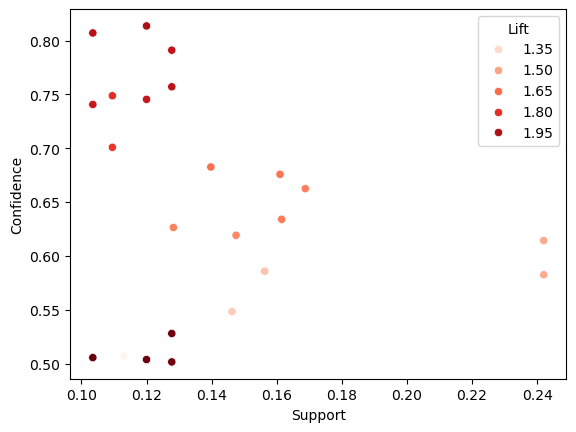

In [134]:
import seaborn as sns
sns.scatterplot(x = 'Support', 
                y = 'Confidence', 
                hue = 'Lift', 
                data = Rules, 
                palette = 'Reds');